 1. import library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from google.colab import files
filenya = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


2. memasukkan dataset yang akan digunakan

In [3]:
housePrice = pd.read_csv('kc_house_data.csv')
housePrice

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


3. terdapat 8 kolom yaitu Area	Room	Parking	Warehouse	Elevator	Price, price(usd), dan address. namun kita hapus 2 kolom  yaitu  price(usd), dan address. **selanjutnya mengecek informasi tipedata pada dataset**

In [4]:
housePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

4.  mengecek deskripsi statistik data dengan fitur describe().

In [5]:
housePrice.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


5. mengecek ada berapa missing value yang ada pada kolom room

In [8]:
x = (housePrice.bedrooms == 0).sum()
 
print("Nilai 0 di kolom  Room ada: ", x)

Nilai 0 di kolom  Room ada:  13


6. menghapus data baris yang terdapat nilai 0 pada kolom room

In [11]:
# Drop baris dengan nilai 'bedrooms' = 0
housePrice = housePrice.loc[(housePrice[['bedrooms']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
housePrice.shape

(21600, 21)

7. melakukan visualisasi pada fitur numerik sisanya.
**Area**

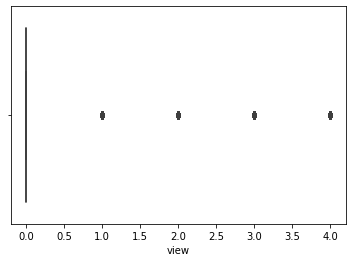

In [13]:
sns.boxplot(x=housePrice['view'])

8. melakukan visualisasi pada fitur numerik sisanya.
**Room**

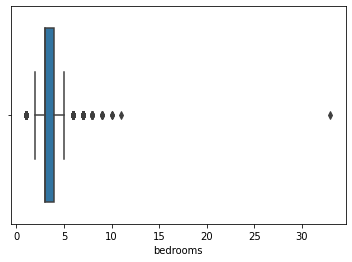

In [14]:
sns.boxplot(x=housePrice['bedrooms'])

9. membagi fitur menjadi dua bagian dengan proses Univariate Analysis

In [27]:
# numerical features dan categorical features.

numerical_features = [ 'floors', 'price', 'bedroom']
categorical_features = ['date']

10. -	Melakukan Exploratory Data Analysis, untuk menunjukkan hubungan antara dua atau lebih variabel pada data. Pada kasus kali ini kita melakukan nya pada fitur katagori yaitu parking, warehouse, elevator, dan pada fitur numerik yaitu harga

                 jumlah sampel  persentase
20140623T000000            142         0.7
20140625T000000            131         0.6
20140626T000000            131         0.6
20140708T000000            127         0.6
20150427T000000            126         0.6
...                        ...         ...
20141102T000000              1         0.0
20150131T000000              1         0.0
20150524T000000              1         0.0
20140517T000000              1         0.0
20140727T000000              1         0.0

[372 rows x 2 columns]


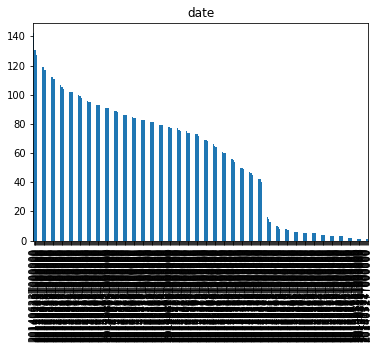

In [19]:
#Categorical Features
#Fitur tanggal
feature = categorical_features[0]
count = housePrice[feature].value_counts()
percent = 100*housePrice[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

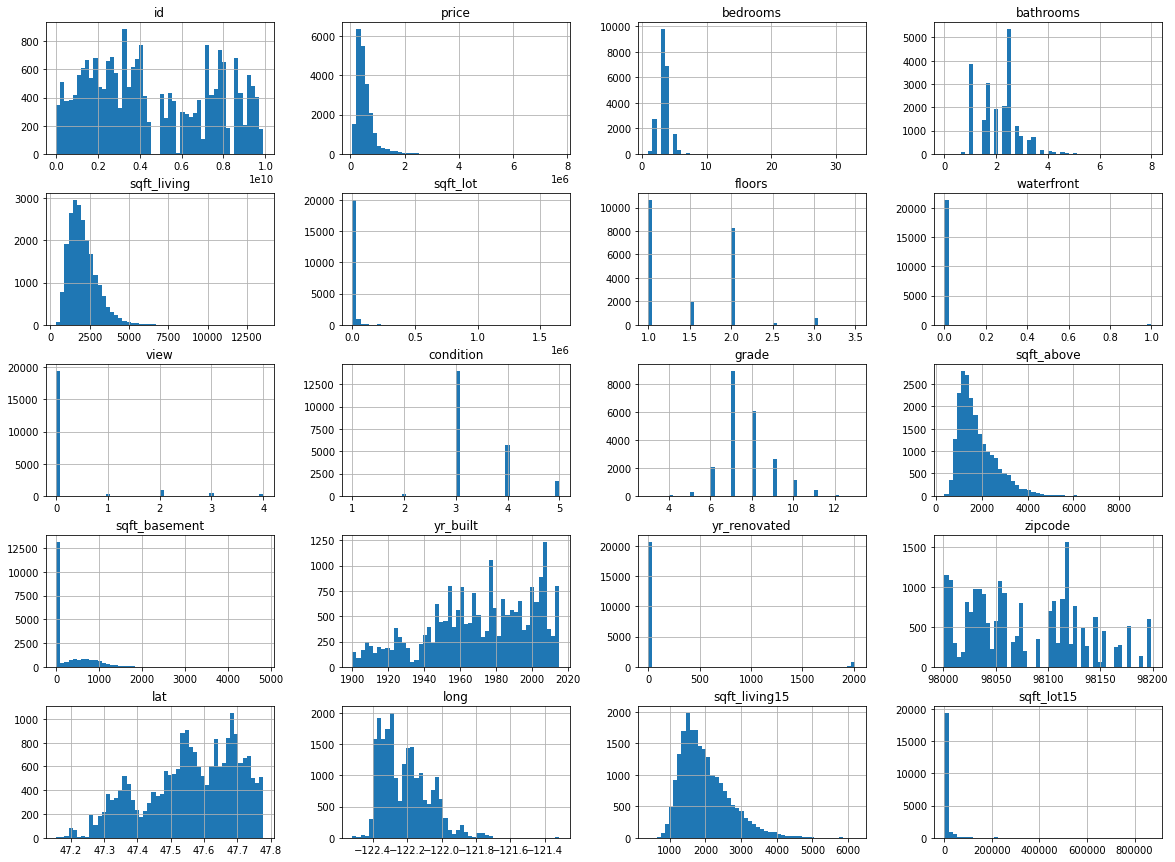

In [20]:
#Numerical Features
#Selanjutnya, untuk fitur numerik, kita akan melihat histogram masing-masing fiturnya menggunakan code berikut.

housePrice.hist(bins=50, figsize=(20,15))
plt.show()

11. mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

In [21]:
#Categorical Features

cat_features = housePrice.select_dtypes(include='bool').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=housePrice, palette="Set3")
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(col))

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

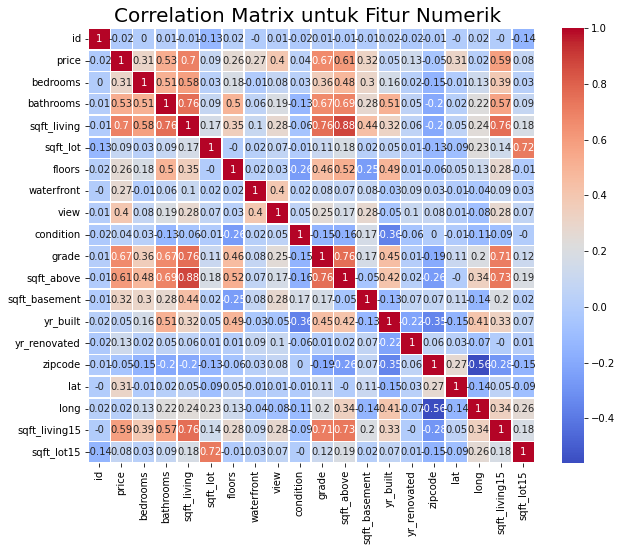

In [22]:
#Untuk mengevaluasi skor korelasinya, gunakan fungsi corr().

plt.figure(figsize=(10, 8))
correlation_matrix = housePrice.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

12. 	Kita memiiki tiga variable kategori yaitu parking, warehouse, dan elevator. Untuk melakukan proses encoding fitur kategori agar menjadi variable numerik, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding

In [24]:
#Data Preparation

from sklearn.preprocessing import  OneHotEncoder
housePrice = pd.concat([housePrice, pd.get_dummies(housePrice['date'], prefix='date')],axis=1)
housePrice.drop(['date'], axis=1, inplace=True)
housePrice.head(20)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,date_20150508T000000,date_20150509T000000,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


13. 	Selanjutnya membagi dataset menjadi data train dan data test agar dapat mempertahankan data yang ada menguji seberapa baik generalisasi model terhadap data baru

In [25]:
#Train-Test-Split

from sklearn.model_selection import train_test_split
 
X = housePrice.drop(["price"],axis =1)
y = housePrice["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [26]:
#Untuk mengecek jumlah sampel pada masing-masing bagian, kita gunakan code berikut.

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 21600
Total # of sample in train dataset: 19440
Total # of sample in test dataset: 2160


14.Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih.

In [30]:
#standarisasi

from sklearn.preprocessing import StandardScaler
 
numerical_features = ['floors', 'bedrooms']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,floors,bedrooms
2051,0.939736,-0.401389
13753,-0.913332,-0.401389
12884,0.939736,0.674888
18293,-0.913332,-1.477666
13667,0.939736,-0.401389


In [31]:
#Untuk mengecek nilai mean dan standar deviasi pada setelah proses standarisasi

X_train[numerical_features].describe().round(4)

,floors,bedrooms
count,19440.0000,19440.0000
mean,0.0000,0.0000
std,1.0000,1.0000
min,-0.9133,-2.5539
25%,-0.9133,-0.4014
50%,0.0132,-0.4014
75%,0.9397,0.6749
max,3.7193,31.8869


15. Pada tahap modelling menggunaka  tiga model yaitu: K-Nearest Neighbor (KNN), Random Forest (RF), dan  Boosting Algorithm

In [32]:
#Model Development dengan K-Nearest Neighbor

# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [33]:
#melatih data dengan KNN, tuliskan code berikut.

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [34]:
#Model Development dengan Random Forest

# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)    

In [35]:
#Model Development dengan Boosting Algorithm

from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

16. Evaluasi Model.
scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1

In [36]:
#proses scaling, implementasikan kode berikut:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

17. evaluasi model. 
 Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma

In [37]:
#evaluasi ketiga model kita dengan metrik MSE yang telah dijelaskan di atas
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,72503516.677402,95250585.61107
RF,3404385.930066,16453460.380518
Boosting,40479812.802299,50100063.443248


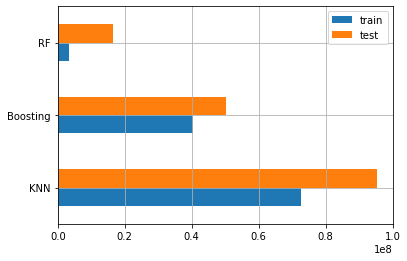

In [38]:
#Untuk memudahkan, mari kita plot metrik tersebut dengan bar chart. Implementasikan kode di bawah ini:


fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=1)
ax.grid(zorder=0)

18. mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test

In [39]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
21585,270000.0,287220.0,278539.9,314372.7


***Model algoritma Boosting memberikan nilai eror yang paling kecil. Sedangkan model dengan RF memiliki eror yang paling besar***